In [1]:
import pickle
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('../../../src')
import analyze
import raybay

In [2]:
# Load treatment plan results
result = np.load('result_lin', allow_pickle=True)

In [5]:
# Reload goal and function dataframes (doesn't save correctly from remote)
result.goal_df = pd.read_csv('../goals.csv') 
result.func_df = pd.read_csv('funcs.csv')
pickle.dump(result, open('result_lin', 'wb'))

In [6]:
# Clinical goals
result.goal_df

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [7]:
# Constituent functions
result.func_df

,Roi,FunctionType,DoseLevel,PercentVolume,EudParameterA,Weight
0,Bronchus,MaxDvh,1560,18.52,NaN,1
1,Bronchus,MaxDose,3480,0.00,NaN,1
2,Chestwall_L,MaxDvh,3000,2.04,NaN,1
3,D2cm,MaxDose,"[600,2400]",0.00,NaN,1
4,Esophagus,MaxDvh,1880,16.91,NaN,1
5,Esophagus,MaxDose,3000,0.00,NaN,1
6,GreatVes,MaxDvh,4300,5.66,NaN,1
7,GreatVes,MaxDose,4900,0.00,NaN,1
8,Heart,MaxDvh,2800,1.84,NaN,1
9,Heart,MaxDose,3400,0.00,NaN,1


In [8]:
# Clinical goal results
compare = pd.DataFrame()
idx_sol = np.argmin(result.opt_result.func_vals)
for idx_goal, row in result.goal_df.iterrows():
    roi = row['Roi']
    goal_type = row['Type']
    level = row['AcceptanceLevel']
    value = result.goal_dict[idx_goal][idx_sol]
    percent = 100*(value - level)/level
    compare = compare.append({'Roi': roi, 'Type': goal_type, 'AcceptanceLevel': level, 
                              'Result': value, 'PercentChange': percent}, ignore_index=True)
compare = compare[['Roi', 'Type', 'AcceptanceLevel', 'Result', 'PercentChange']] # enforce column order
compare

,Roi,Type,AcceptanceLevel,Result,PercentChange
0,Bronchus,MaxDvh,1560.0,659.353715,-57.733736
1,Bronchus,MaxDose,3480.0,1600.722778,-54.002219
2,Chestwall_L,MaxDvh,3000.0,1632.606745,-45.579775
3,D2cm,MaxDose,2400.0,3147.605469,31.150228
4,Esophagus,MaxDvh,1880.0,595.243427,-68.338116
5,Esophagus,MaxDose,3000.0,785.194153,-73.826862
6,GreatVes,MaxDvh,4300.0,924.539441,-78.499083
7,GreatVes,MaxDose,4900.0,1401.723633,-71.393395
8,Heart,MaxDvh,2800.0,680.400601,-75.699979
9,Heart,MaxDose,3400.0,1122.656738,-66.980684


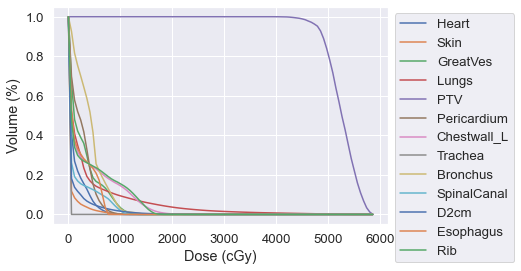

In [9]:
# Dose-volume histograms
result.dvhplot()

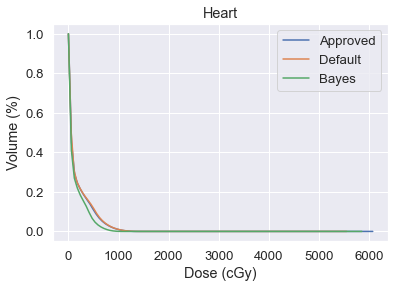

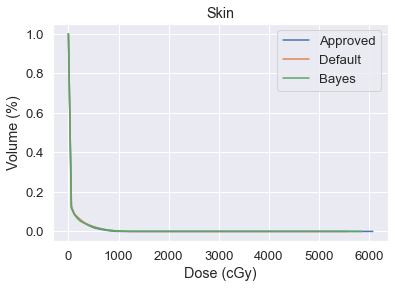

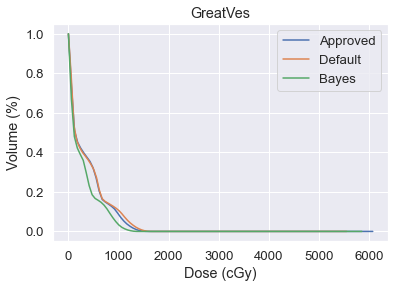

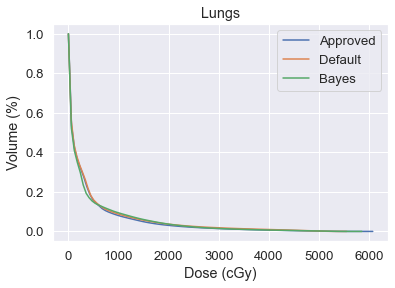

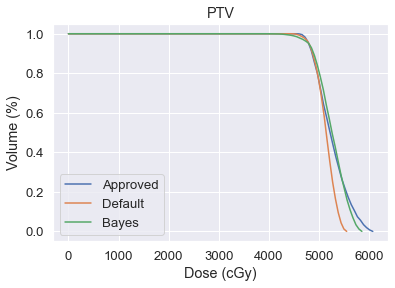

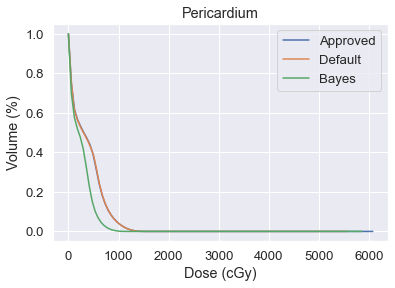

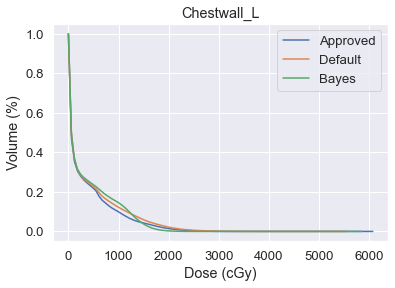

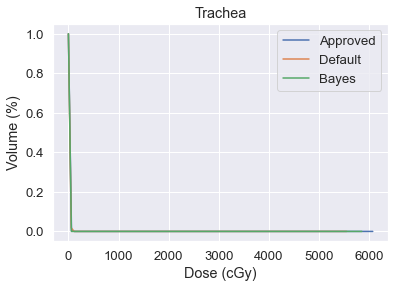

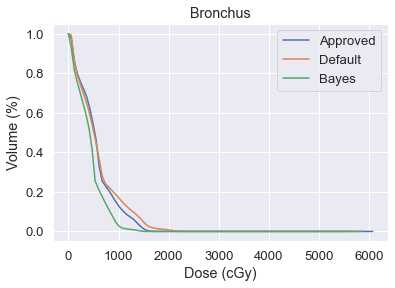

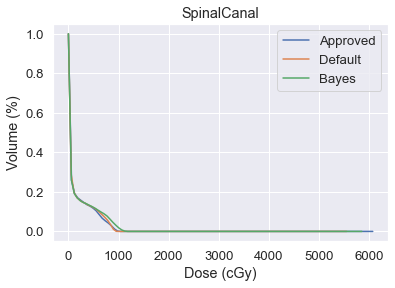

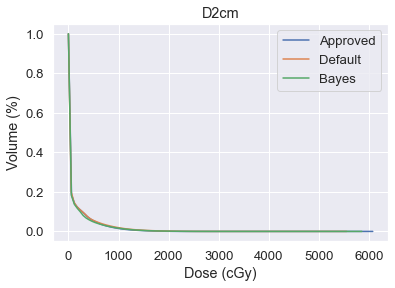

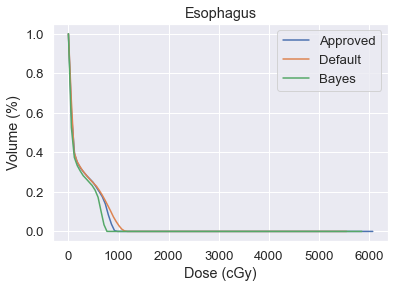

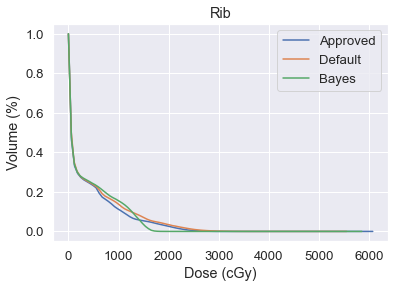

In [10]:
# Compare to approved and default plans
approved = np.load('../approved/result', allow_pickle=True)
default = np.load('../default/result', allow_pickle=True)
for roi in result.roi_list:
    plt.figure()
    plt.plot(approved.dvh_dict['Dose'], approved.dvh_dict[roi])
    plt.plot(default.dvh_dict['Dose'], default.dvh_dict[roi])
    plt.plot(result.dvh_dict['Dose'], result.dvh_dict[roi])
    plt.xlabel('Dose (cGy)')
    plt.ylabel('Volume (%)')
    plt.title(roi)
    plt.legend(['Approved', 'Default', 'Bayes'])

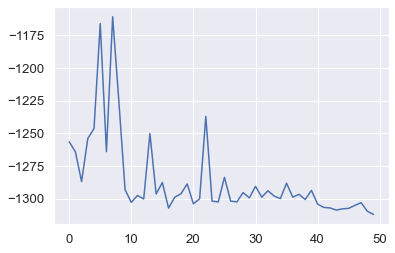

In [13]:
plt.plot(result.opt_result.func_vals)

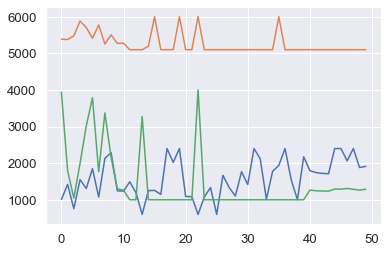

In [14]:
plt.plot(result.opt_result.x_iters)

In [11]:
# Compare DC2m MaxDose
idx_d2 = approved.goal_df[approved.goal_df['Roi'] == 'D2cm'].index[0]
print(f"AcceptanceLevel: {approved.goal_df.iloc[idx_d2]['AcceptanceLevel']}, " +
      f"Approved: {approved.goal_dict[idx_d2][0]:.2f}, " +
      f"Default: {default.goal_dict[idx_d2][0]:.2f}, " +
      f"Result: {result.goal_dict[idx_d2][idx_sol]:.2f}")

AcceptanceLevel: 2400, Approved: 2513.27, Default: 3082.28, Result: 3147.61


In [12]:
# Compare goal results
for idx_goal, row in approved.goal_df.iterrows():
    level = row['AcceptanceLevel']
    app_val = approved.goal_dict[idx_goal][0]
    def_val = default.goal_dict[idx_goal][0]
    res_val = result.goal_dict[idx_goal][idx_sol]
    print(f"Roi: {row['Roi']}, Approved: {100*(app_val - level)/level:.2f}, " +
          f"Default: {100*(def_val - level)/level:.2f}, " +
          f"Result: {100*(res_val - level)/level:.2f}")

Roi: Bronchus, Approved: -44.69, Default: -38.97, Result: -57.73
Roi: Bronchus, Approved: -49.12, Default: -35.17, Result: -54.00
Roi: Chestwall_L, Approved: -37.88, Default: -32.47, Result: -45.58
Roi: D2cm, Approved: 4.72, Default: 28.43, Result: 31.15
Roi: Esophagus, Approved: -63.35, Default: -62.48, Result: -68.34
Roi: Esophagus, Approved: -67.97, Default: -60.64, Result: -73.83
Roi: GreatVes, Approved: -74.63, Default: -72.61, Result: -78.50
Roi: GreatVes, Approved: -66.06, Default: -65.80, Result: -71.39
Roi: Heart, Approved: -68.24, Default: -67.95, Result: -75.70
Roi: Heart, Approved: -57.57, Default: -55.44, Result: -66.98
Roi: Lungs, Approved: -60.82, Default: -57.34, Result: -53.70
Roi: Lungs, Approved: -75.56, Default: -74.81, Result: -79.03
Roi: Pericardium, Approved: -62.60, Default: -62.71, Result: -74.95
Roi: Pericardium, Approved: -53.65, Default: -55.53, Result: -65.26
Roi: PTV, Approved: 0.00, Default: 0.00, Result: 0.00
Roi: PTV, Approved: 8.80, Default: 7.14, Resu

In [45]:
result_linear = np.load('result_linear', allow_pickle=True)
idx_lin = np.argmin(result_linear.opt_result.func_vals)

In [54]:
# Compare goal results (LaTeX table)
X = np.zeros((24, 4))
result_linear = np.load('result_linear', allow_pickle=True)
idx_lin = np.argmin(result_linear.opt_result.func_vals)
for idx_goal, row in approved.goal_df.iterrows():
    level = row['AcceptanceLevel']
    app_val = approved.goal_dict[idx_goal][0]
    def_val = default.goal_dict[idx_goal][0]
    lin_val = result_linear.goal_dict[idx_goal][idx_lin]
    res_val = result.goal_dict[idx_goal][idx_sol]
    X[idx_goal, :] = [-100*(app_val - level)/level, -100*(def_val - level)/level, -100*(lin_val - level)/level, -100*(res_val - level)/level]
    print(f"{row['Roi']} {row['Type']} & {-100*(app_val - level)/level:.2f} " +
          f"& {-100*(def_val - level)/level:.2f} " +
          f"& {-100*(lin_val - level)/level:.2f} " +
          f"& {-100*(res_val - level)/level:.2f} \\\\")

Bronchus MaxDvh & 44.69 & 38.97 & 60.57 & 42.71 \\
Bronchus MaxDose & 49.12 & 35.17 & 52.51 & 42.28 \\
Chestwall_L MaxDvh & 37.88 & 32.47 & 47.18 & 43.06 \\
D2cm MaxDose & -4.72 & -28.43 & -23.53 & 0.33 \\
Esophagus MaxDvh & 63.35 & 62.48 & 72.24 & 65.03 \\
Esophagus MaxDose & 67.97 & 60.64 & 72.52 & 62.92 \\
GreatVes MaxDvh & 74.63 & 72.61 & 81.12 & 75.37 \\
GreatVes MaxDose & 66.06 & 65.80 & 75.36 & 68.34 \\
Heart MaxDvh & 68.24 & 67.95 & 74.57 & 70.89 \\
Heart MaxDose & 57.57 & 55.44 & 66.39 & 57.97 \\
Lungs MaxDvh & 60.82 & 57.34 & 55.79 & 66.57 \\
Lungs MaxDvh & 75.56 & 74.81 & 79.34 & 76.92 \\
Pericardium MaxDvh & 62.60 & 62.71 & 73.48 & 64.74 \\
Pericardium MaxDose & 53.65 & 55.53 & 64.44 & 56.71 \\
PTV MinDvh & -0.00 & -0.00 & -0.00 & -0.00 \\
PTV MinDvh & -8.80 & -7.14 & -3.28 & -6.72 \\
PTV MaxDose & -1.27 & 7.42 & -11.71 & -0.16 \\
Rib MaxDvh & 18.10 & 9.99 & 48.50 & 24.24 \\
Rib MaxDose & 17.44 & 1.47 & 51.54 & 27.76 \\
Skin MaxDvh & 74.90 & 70.90 & 71.60 & 76.92 \\
Skin Ma

In [75]:
my_dict

{'Bronchus MaxDvh': 0,
 'Bronchus MaxDose': 1,
 'Chestwall_L MaxDvh': 2,
 'D2cm MaxDose': 3,
 'Esophagus MaxDvh': 4,
 'Esophagus MaxDose': 5,
 'GreatVes MaxDvh': 6,
 'GreatVes MaxDose': 7,
 'Heart MaxDvh': 8,
 'Heart MaxDose': 9,
 'Lungs MaxDvh': 11,
 'Pericardium MaxDvh': 12,
 'Pericardium MaxDose': 13,
 'PTV MinDvh': 15,
 'PTV MaxDose': 16,
 'Rib MaxDvh': 17,
 'Rib MaxDose': 18,
 'Skin MaxDvh': 19,
 'Skin MaxDose': 20,
 'SpinalCanal MaxDvh': 21,
 'Trachea MaxDvh': 22,
 'Trachea MaxDose': 23}

In [77]:
Y = pd.DataFrame(columns=['Approved', 'Default', 'Linear', 'Linear-Quadratic'], data=X,
                 index=my_dict)

In [67]:
{f"{row['Roi']} {row['Type']}": index for index, row in approved.goal_df.iterrows()}

{'Bronchus MaxDvh': 0,
 'Bronchus MaxDose': 1,
 'Chestwall_L MaxDvh': 2,
 'D2cm MaxDose': 3,
 'Esophagus MaxDvh': 4,
 'Esophagus MaxDose': 5,
 'GreatVes MaxDvh': 6,
 'GreatVes MaxDose': 7,
 'Heart MaxDvh': 8,
 'Heart MaxDose': 9,
 'Lungs MaxDvh': 11,
 'Pericardium MaxDvh': 12,
 'Pericardium MaxDose': 13,
 'PTV MinDvh': 15,
 'PTV MaxDose': 16,
 'Rib MaxDvh': 17,
 'Rib MaxDose': 18,
 'Skin MaxDvh': 19,
 'Skin MaxDose': 20,
 'SpinalCanal MaxDvh': 21,
 'Trachea MaxDvh': 22,
 'Trachea MaxDose': 23}

In [76]:
my_dict = {'1 Bronchus MaxDvh': 0,
 '2 Bronchus MaxDose': 1,
 '3 Chestwall_L MaxDvh': 2,
 '4 D2cm MaxDose': 3,
 '5 Esophagus MaxDvh': 4,
 '6 Esophagus MaxDose': 5,
 '7 GreatVes MaxDvh': 6,
 '8 GreatVes MaxDose': 7,
 '9 Heart MaxDvh': 8,
 '10 Heart MaxDose': 9,
 '11 Lungs MaxDvh': 11,
 '12 Lungs MaxDvh': 12,
 '13 Pericardium MaxDvh': 13,
 '14 Pericardium MaxDose': 14,
 '15 PTV MinDvh': 15,
 '16 PTV MinDvh': 16,
 '17 PTV MaxDose': 17,
 '18 Rib MaxDvh': 18,
 '19 Rib MaxDose': 19,
 '20 Skin MaxDvh': 20,
 '21 Skin MaxDose': 21,
 '22 SpinalCanal MaxDvh': 22,
 '23 Trachea MaxDvh': 23,
 '24 Trachea MaxDose': 24}

In [95]:
Z = Y = pd.DataFrame(columns=['Approved', 'Default', 'Linear'], data=X[:,:-1],
                 index=my_dict)

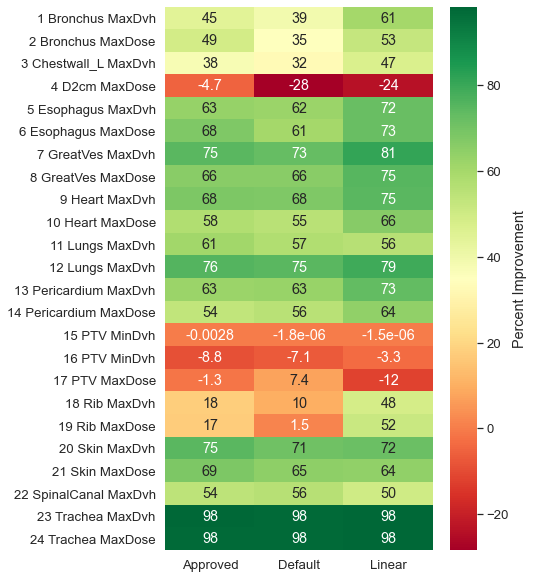

In [96]:
f, ax = plt.subplots(1, figsize=(6, 10))
sns.heatmap(Z, annot=True, cmap='RdYlGn', ax=ax, cbar_kws={'label': 'Percent Improvement'})

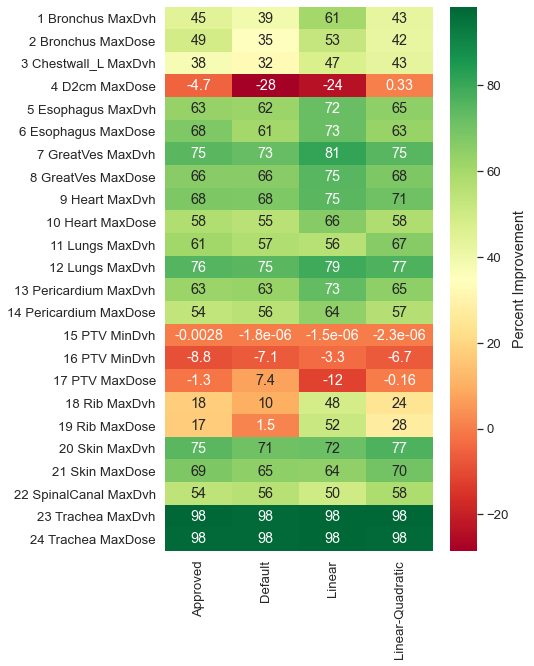

In [94]:
f, ax = plt.subplots(1, figsize=(6, 10))
sns.heatmap(Y, annot=True, cmap='RdYlGn', ax=ax, cbar_kws={'label': 'Percent Improvement'})

In [52]:
approved.goal_df.iloc[15]

Roi                    PTV
Type                MinDvh
GoalCriteria       AtLeast
AcceptanceLevel       4320
ParameterValue          99
Name: 15, dtype: object

In [51]:
approved.goal_dict[15]

[4700.361260815121]

In [11]:
# For the parameters we tuned, we improved upon the values from the default plan.
# For the parameters we didn't tune, we still improved upon the values from the default plan.
# Some values we improved upon the approved plan, and some we didn't. 
# We DID NOT meet the D2cm goal :(

In [36]:
score_app

-1190.1045447609704

In [37]:
score_def

-318.65586614844347

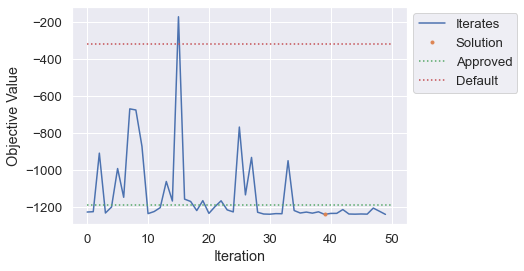

In [38]:
# Objective function convergence
plt.plot(result.opt_result.func_vals)
plt.plot(idx_sol, result.opt_result.fun, '.')
plt.plot([0, 50], [score_app, score_app], ':')
plt.plot([0, 50], [score_def, score_def], ':')
plt.xlabel('Iteration')
plt.ylabel('Objective Value')
plt.legend(['Iterates', 'Solution', 'Approved', 'Default'],
           bbox_to_anchor=(1, 1));

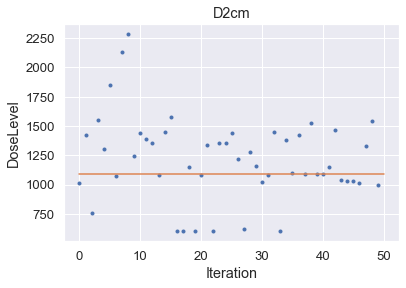

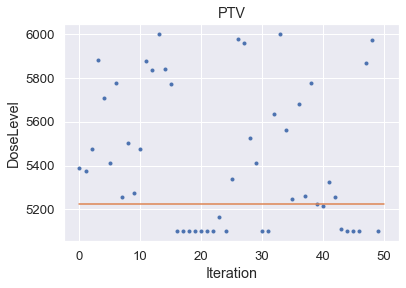

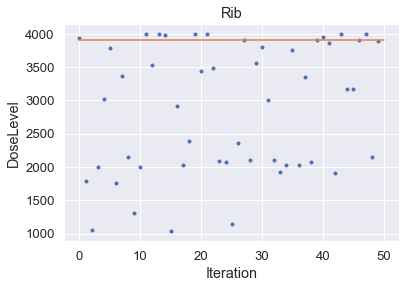

In [20]:
# Parameter value convergence
x_iters = [[row[ii] for row in result.opt_result.x_iters] for ii in range(len(result.opt_result.x_iters[0]))]
pars = analyze.get_pars(result.func_df)
for ii, vals in enumerate(x_iters):
    plt.figure()
    plt.plot(vals, '.')
    plt.plot([0, 50], [result.opt_result.x[ii], result.opt_result.x[ii]])
    plt.xlabel('Iteration')
    plt.ylabel(pars.iloc[ii]['Par'])
    plt.title(pars.iloc[ii]['Roi'])

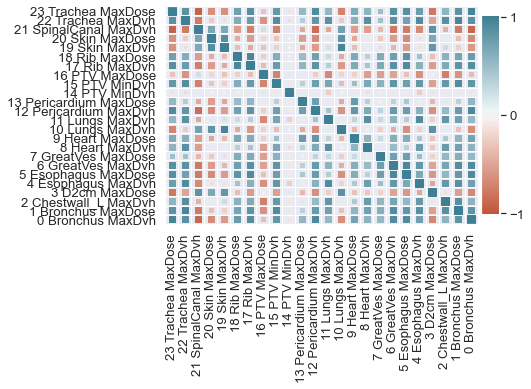

In [21]:
result.corrplot(size=50)

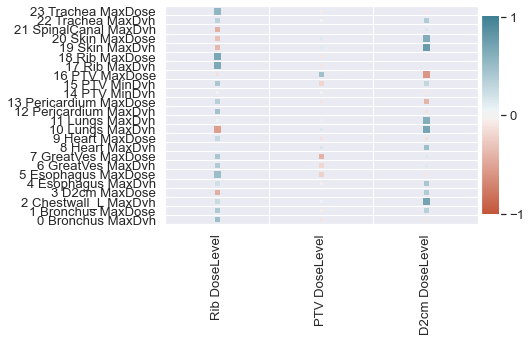

In [22]:
result.corrplot('pars', size=50)

In [97]:
xdata, xlabels = analyze.format_data(result_linear.goal_df, result_linear.goal_dict, 'goals')

In [98]:
xdata2 = []
for ii in range(len(xdata)):
    sign = 1 if 'Max' in result_linear.goal_df.iloc[ii]['Type'] else -1
    level = result_linear.goal_df.iloc[ii]['AcceptanceLevel']
    xdata2.append([sign*(val - level)/level for val in xdata[ii]])
xlabels2 = [str(ii) + ' ' + xlabels[ii] for ii in range(len(xlabels))]

In [99]:
goals = pd.DataFrame(columns=xlabels2, data={xlabels2[ii]: xdata2[ii] for ii in range(len(xlabels2))})
goals

,0 0 Bronchus MaxDvh,1 1 Bronchus MaxDose,2 2 Chestwall_L MaxDvh,3 3 D2cm MaxDose,4 4 Esophagus MaxDvh,5 5 Esophagus MaxDose,6 6 GreatVes MaxDvh,7 7 GreatVes MaxDose,8 8 Heart MaxDvh,9 9 Heart MaxDose,...,14 14 PTV MinDvh,15 15 PTV MinDvh,16 16 PTV MaxDose,17 17 Rib MaxDvh,18 18 Rib MaxDose,19 19 Skin MaxDvh,20 20 Skin MaxDose,21 21 SpinalCanal MaxDvh,22 22 Trachea MaxDvh,23 23 Trachea MaxDose
0,-0.434749,-0.430734,-0.434655,-0.013081,-0.654859,-0.639415,-0.752884,-0.685091,-0.707548,-0.577607,...,-2.379210e-08,-0.058727,0.041905,-0.255915,-0.277715,-0.771018,-0.699749,-0.599619,-0.979617,-0.977080
1,-0.445399,-0.415717,-0.431251,0.050313,-0.638351,-0.639587,-0.747327,-0.689618,-0.703743,-0.582708,...,-2.444501e-08,-0.065510,0.006531,-0.312898,-0.361832,-0.772027,-0.699566,-0.581422,-0.979351,-0.977983
2,-0.469839,-0.500474,-0.487141,0.152353,-0.679172,-0.681950,-0.780428,-0.724325,-0.697883,-0.573569,...,2.877532e-08,-0.035196,0.117664,-0.463988,-0.447201,-0.753834,-0.690512,-0.568230,-0.980705,-0.979551
3,-0.430224,-0.402864,-0.406341,0.025967,-0.649214,-0.640935,-0.755727,-0.701418,-0.691023,-0.576449,...,-1.049118e-08,-0.074290,-0.020942,-0.279933,-0.336289,-0.754906,-0.696917,-0.595069,-0.978559,-0.977486
4,-0.411639,-0.421291,-0.426172,-0.022316,-0.642304,-0.638141,-0.757016,-0.703523,-0.698091,-0.577191,...,1.933787e-08,-0.063695,0.057840,-0.245386,-0.268204,-0.767653,-0.694401,-0.597888,-0.978899,-0.976737
5,-0.366627,-0.350774,-0.349210,0.125759,-0.612337,-0.592590,-0.725985,-0.667030,-0.678946,-0.550226,...,5.086263e-08,-0.077265,-0.067511,-0.138241,-0.113166,-0.738692,-0.678902,-0.579995,-0.977193,-0.975959
6,-0.442525,-0.434863,-0.440201,0.015706,-0.662091,-0.648326,-0.765907,-0.713265,-0.708329,-0.586248,...,-1.822143e-08,-0.057416,0.101267,-0.297516,-0.341322,-0.773618,-0.700685,-0.588035,-0.979465,-0.977084
7,-0.400675,-0.361223,-0.347633,0.218046,-0.629974,-0.608534,-0.732706,-0.668621,-0.687385,-0.563275,...,-8.077760e-08,-0.074629,-0.073412,-0.139191,-0.084322,-0.722291,-0.662744,-0.567707,-0.977677,-0.977111
8,-0.456413,-0.413226,-0.384262,0.231115,-0.659859,-0.641212,-0.747572,-0.670974,-0.707373,-0.597224,...,3.249301e-09,-0.074438,-0.068623,-0.259602,-0.300537,-0.719014,-0.666884,-0.557106,-0.979115,-0.979153
9,-0.493961,-0.518276,-0.474225,0.202575,-0.671862,-0.696508,-0.783935,-0.730011,-0.709111,-0.599608,...,-2.422460e-08,-0.046673,0.009082,-0.449571,-0.482757,-0.731972,-0.644717,-0.520003,-0.981060,-0.979917


In [26]:
import scipy
import scipy.cluster.hierarchy as sch
import seaborn as sns
sns.set(color_codes=True, font_scale=1.2)

In [100]:
X = goals.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [goals.columns.tolist()[i] for i in list((np.argsort(ind)))]
goals2 = goals.reindex(columns=columns)

In [101]:
idx = list(np.argsort(ind))

In [102]:
xdata = np.array(xdata2)[idx]
ydata = xdata
xlabels = [xlabels[ii] for ii in idx]
ylabels = xlabels

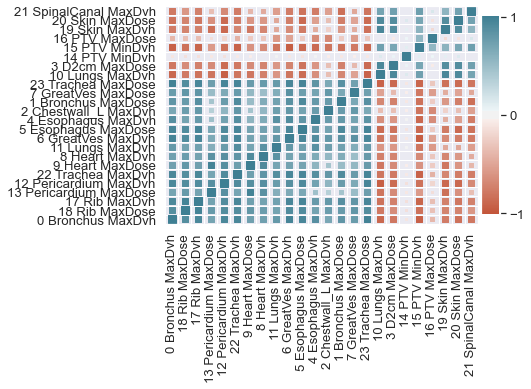

In [103]:
# Plot boxes
title=None
size=50
palette = sns.diverging_palette(20, 220, n=256)
plot_grid = plt.GridSpec(1, 15)
ax = plt.subplot(plot_grid[:, :-1])
for ii in range(len(xdata)):
    for jj in range(len(ydata)):
        corr = np.corrcoef(xdata[ii], ydata[jj])[0, 1]
        ax.scatter(ii, jj, marker='s', s=size*abs(corr),
                   c=[palette[int(255/2*(corr + 1))]])

# Initialize tick labels
ax.set_xticks(range(len(xdata)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_yticks(range(len(ydata)))
ax.set_yticklabels(ylabels)
ax.set_title(title)

# Adjust grid lines relative to boxes
ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
ax.set_xlim([-0.5, len(xlabels) - 0.5])
ax.set_ylim([-0.5, len(ylabels) - 0.5])

# Legend
ax = plt.subplot(plot_grid[:, -1])
bar_y = np.linspace(-1, 1, len(palette))
bar_h = bar_y[1] - bar_y[0]
ax.barh(y=bar_y, width=[1]*len(palette), height=bar_h, color=palette,
        linewidth=0)
ax.set_facecolor('w')
ax.set_xticks([])
ax.set_yticks([-1, 0, 1])
ax.yaxis.tick_right()

In [31]:
xdata, xlabels = analyze.format_data(result.func_df, result.opt_result.x_iters, 'pars')

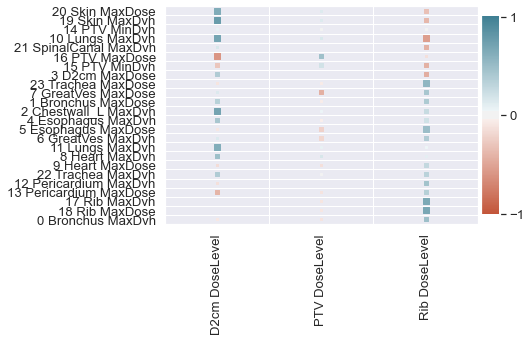

In [32]:
# Plot boxes
palette = sns.diverging_palette(20, 220, n=256)
plot_grid = plt.GridSpec(1, 15)
ax = plt.subplot(plot_grid[:, :-1])
for ii in range(len(xdata)):
    for jj in range(len(ydata)):
        corr = np.corrcoef(xdata[ii], ydata[jj])[0, 1]
        ax.scatter(ii, jj, marker='s', s=size*abs(corr),
                   c=[palette[int(255/2*(corr + 1))]])

# Initialize tick labels
ax.set_xticks(range(len(xdata)))
ax.set_xticklabels(xlabels, rotation=90)
ax.set_yticks(range(len(ydata)))
ax.set_yticklabels(ylabels)
ax.set_title(title)

# Adjust grid lines relative to boxes
ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
ax.set_xlim([-0.5, len(xlabels) - 0.5])
ax.set_ylim([-0.5, len(ylabels) - 0.5])

# Legend
ax = plt.subplot(plot_grid[:, -1])
bar_y = np.linspace(-1, 1, len(palette))
bar_h = bar_y[1] - bar_y[0]
ax.barh(y=bar_y, width=[1]*len(palette), height=bar_h, color=palette,
        linewidth=0)
ax.set_facecolor('w')
ax.set_xticks([])
ax.set_yticks([-1, 0, 1])
ax.yaxis.tick_right()

In [29]:
# Problem: Two competing groups, one has higher number of terms... 

In [34]:
def linear(value, level, sign):
    return 100*(value - level)/level

def linear_quadratic(value, level, sign):
    if sign > 0:
        if value < level:
            return linear(value, level, sign)
        else:
            return linear(value + level/200, level, sign)**2 - 1/4
    else:
        if value > level:
            return linear(value, level, sign)
        else:
            return -linear(value - level/200, level, sign)**2 + 1/4

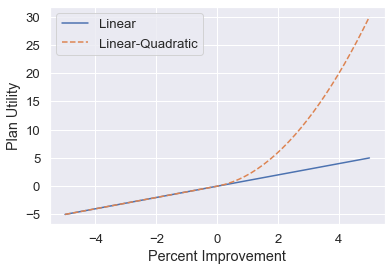

In [112]:
vals = np.linspace(95,105)
sign = 1.0
plt.plot(vals - 100, linear(vals, 100, sign))
plt.plot(vals - 100, [linear_quadratic(val, 100, sign) for val in vals], '--')
plt.xlabel('Percent Improvement')
plt.ylabel('Plan Utility')
plt.legend(['Linear', 'Linear-Quadratic'])

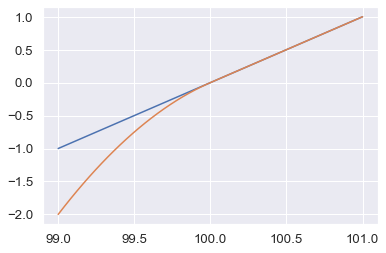

In [100]:
sign = -1.0
plt.plot(vals, linear(vals, 100, sign))
plt.plot(vals, [linear_quadratic(val, 100, sign) for val in vals])

/Users/Kelsey/anaconda3/envs/autoray/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  from ipykernel import kernelapp as app


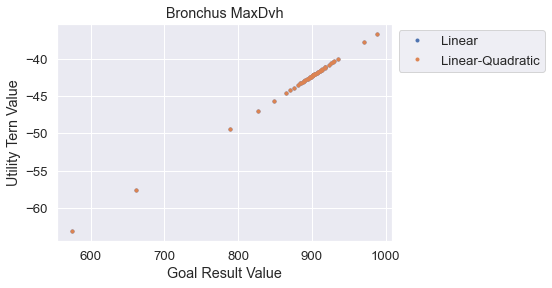

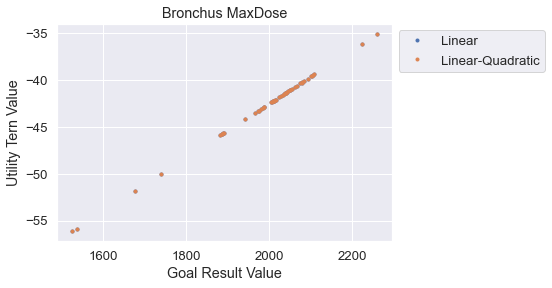

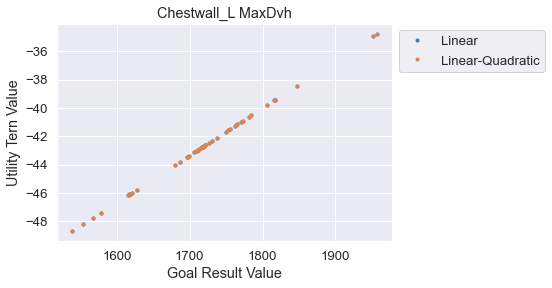

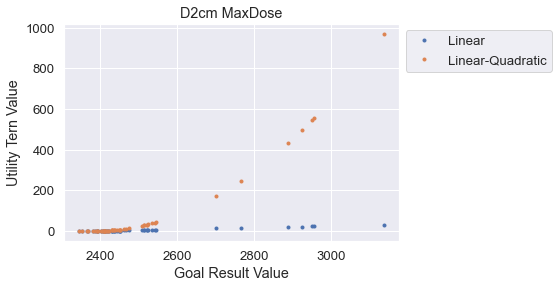

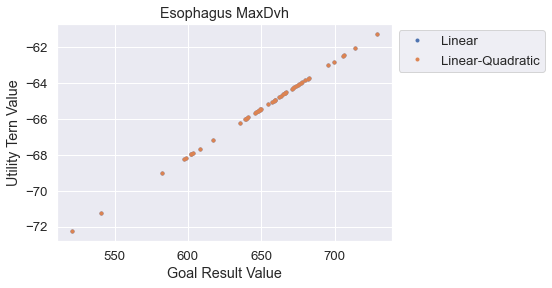

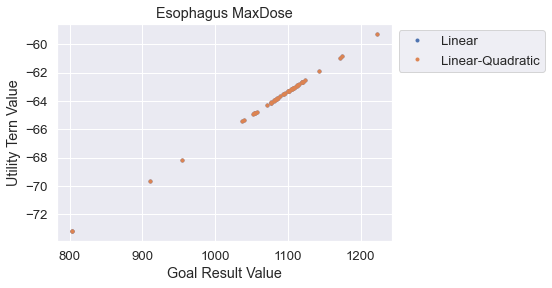

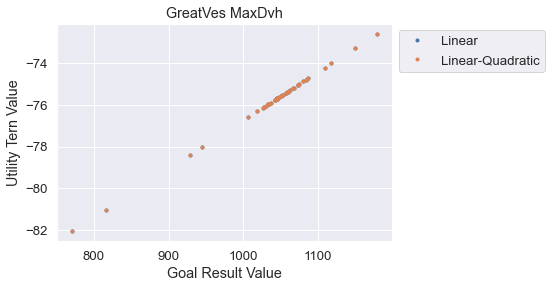

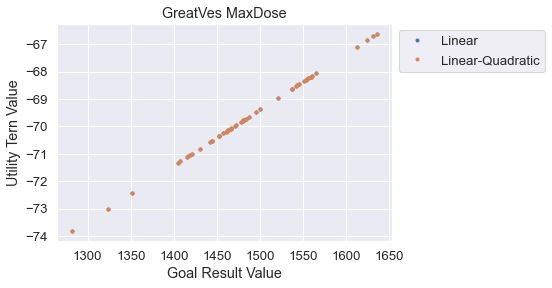

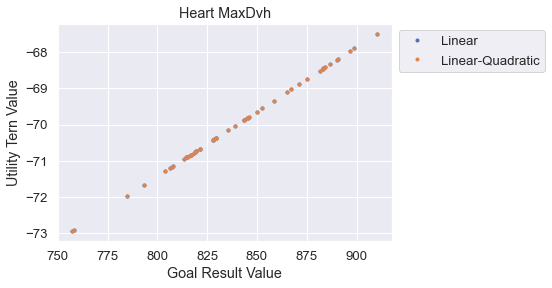

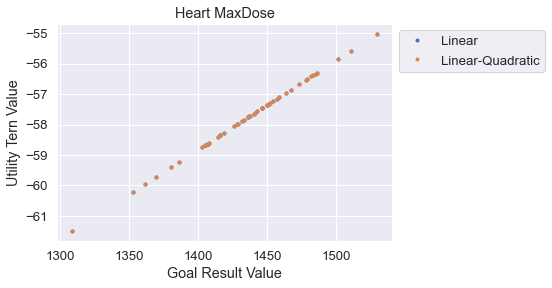

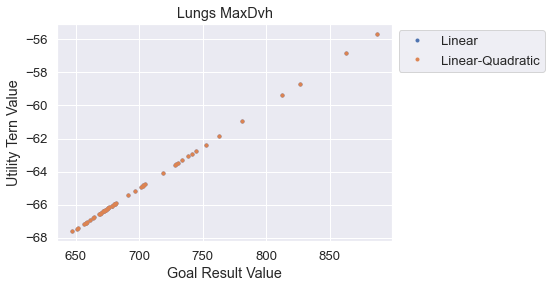

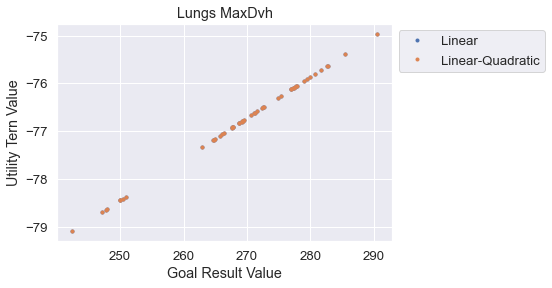

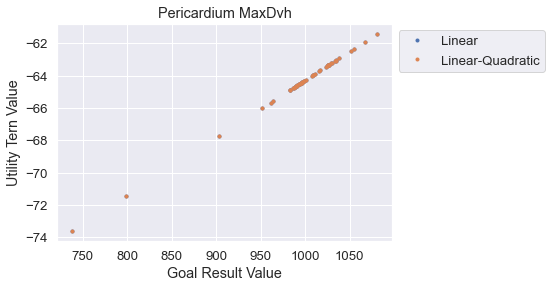

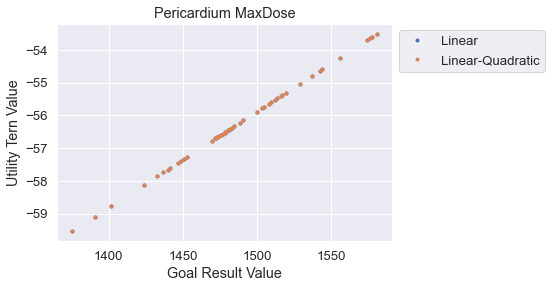

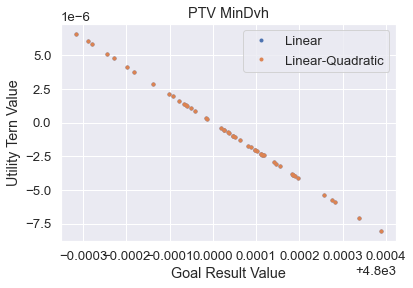

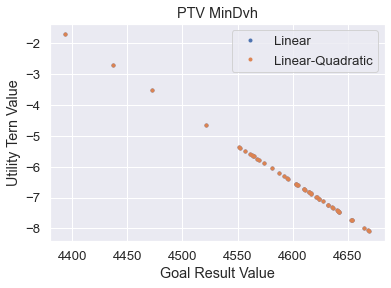

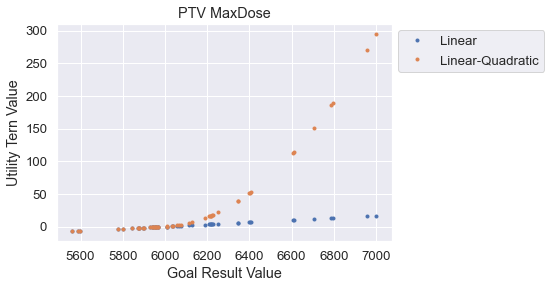

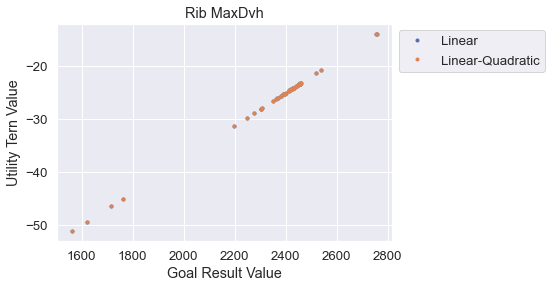

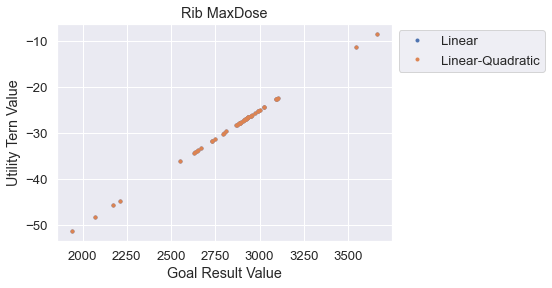

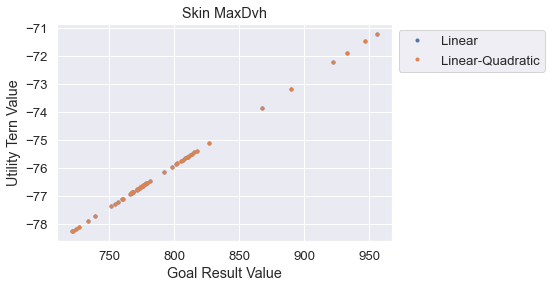

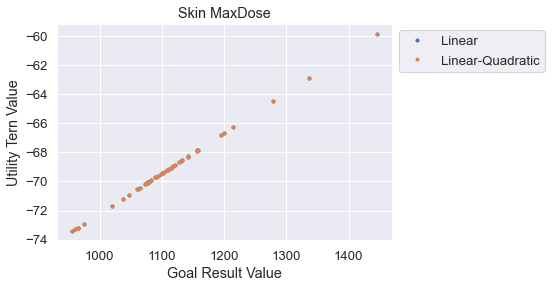

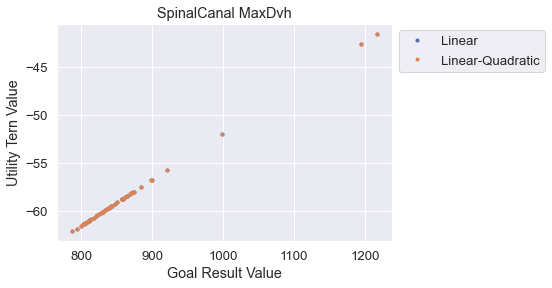

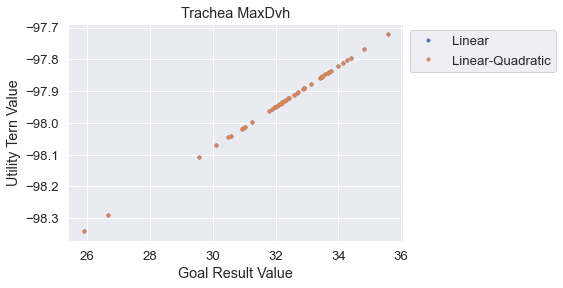

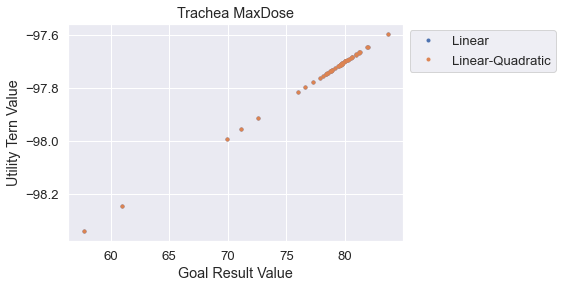

In [35]:
scores_linear = np.zeros(50)
scores_quadratic = np.zeros(50)
score_app = 0
score_def = 0
for index, row in result.goal_df.iterrows():
    level = row['AcceptanceLevel']
    sign = 1.0 if 'Max' in row['Type'] else -1.0
    vals = result.goal_dict[index]
    f = [sign*linear(val, level, sign) for val in vals]
    g = [sign*linear_quadratic(val, level, sign) for val in vals]
    scores_linear += np.array(f)
    scores_quadratic += np.array(g)
    score_app += sign*linear_quadratic(approved.goal_dict[index][0], level, sign)
    score_def += sign*linear_quadratic(default.goal_dict[index][0], level, sign)
    plt.figure()
    plt.plot(vals, f, '.')
    plt.plot(vals, g, '.')
    plt.xlabel('Goal Result Value')
    plt.ylabel('Utility Tern Value')
    plt.title(f"{row['Roi']} {row['Type']}")
    plt.legend(['Linear', 'Linear-Quadratic'], bbox_to_anchor=(1, 1))

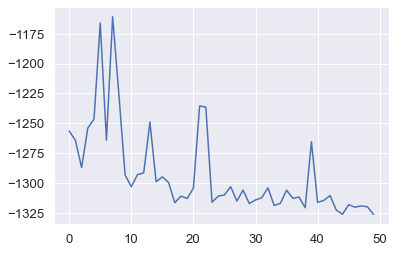

In [104]:
plt.plot(scores_linear)

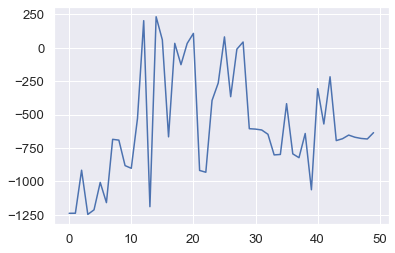

In [105]:
plt.plot(scores_quadratic)

In [106]:
np.argmin(scores_quadratic)

3

In [107]:
# D2cm = 3, PTV Max = 16
result.goal_dic

,Roi,Type,GoalCriteria,AcceptanceLevel,ParameterValue
0,Bronchus,MaxDvh,AtMost,1560,18.52
1,Bronchus,MaxDose,AtMost,3480,NaN
2,Chestwall_L,MaxDvh,AtMost,3000,2.04
3,D2cm,MaxDose,AtMost,2400,NaN
4,Esophagus,MaxDvh,AtMost,1880,16.91
5,Esophagus,MaxDose,AtMost,3000,NaN
6,GreatVes,MaxDvh,AtMost,4300,5.66
7,GreatVes,MaxDose,AtMost,4900,NaN
8,Heart,MaxDvh,AtMost,2800,1.84
9,Heart,MaxDose,AtMost,3400,NaN


In [13]:
idx_sol = np.argmin(result.opt_result.func_vals)

Text(0, 0.5, 'Objective')

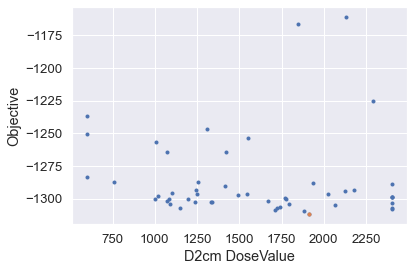

In [14]:
plt.plot(x_iters[:,0], result.opt_result.func_vals, '.')
plt.plot(x_iters[idx_sol,0], result.opt_result.func_vals[idx_sol], '.')
plt.xlabel('D2cm DoseValue')
plt.ylabel('Objective')

Text(0, 0.5, 'Objective')

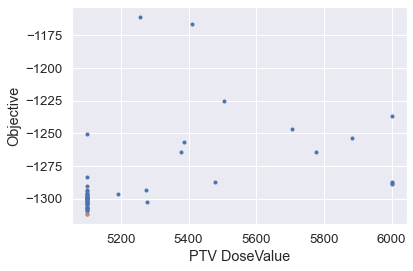

In [15]:
plt.plot(x_iters[:,1], result.opt_result.func_vals, '.')
plt.plot(x_iters[idx_sol,1], result.opt_result.func_vals[idx_sol], '.')
plt.xlabel('PTV DoseValue')
plt.ylabel('Objective')

Text(0, 0.5, 'Objective')

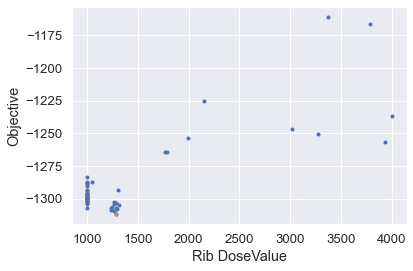

In [16]:
plt.plot(x_iters[:,2], result.opt_result.func_vals, '.')
plt.plot(x_iters[idx_sol,2], result.opt_result.func_vals[idx_sol], '.')
plt.xlabel('Rib DoseValue')
plt.ylabel('Objective')